In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import files
uploaded=files.upload()

Saving bank_full.csv to bank_full.csv


In [4]:
data=pd.read_csv('bank_full.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
data=pd.get_dummies(data,columns=['job','marital','education','default','housing','loan','contact','month','poutcome','y'])
data

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,33,2,5,76,1,-1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
3,47,1506,5,92,1,-1,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,1,0,0,0,0,1,0,0,1
45209,57,668,17,508,4,-1,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0


In [9]:
data=data.rename(columns={'job_admin.':'job_admin'})

In [10]:
data.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,33,2,5,76,1,-1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
3,47,1506,5,92,1,-1,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0


In [11]:
data.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'y_no', 'y_yes'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 53 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   job_admin            45211 non-null  uint8
 8   job_blue-collar      45211 non-null  uint8
 9   job_entrepreneur     45211 non-null  uint8
 10  job_housemaid        45211 non-null  uint8
 11  job_management       45211 non-null  uint8
 12  job_retired          45211 non-null  uint8
 13  job_self-employed    45211 non-null  uint8
 14  job_services         45211 non-null  uint8
 15  job_student          45211 non-null  uint8
 16  job_technician       4

In [13]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous,job_admin,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,-0.055717,-0.044002,0.021792,...,-0.127431,0.032775,0.060116,0.032418,-0.004927,-0.022967,0.035526,-0.000816,-0.025155,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,-0.026726,-0.048757,0.009642,...,-0.071121,0.117254,0.040198,0.021922,0.011857,0.008466,0.035240,-0.030271,-0.052838,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.010455,-0.022898,-0.002312,...,-0.025066,0.096080,0.030514,-0.053890,-0.068700,-0.032952,-0.030321,0.086256,0.028348,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,-0.015722,0.009637,-0.001327,...,0.007089,-0.006041,0.015076,0.015077,-0.018925,-0.001958,0.042389,-0.003491,-0.394521,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.021868,0.008986,0.002128,...,-0.067551,-0.084697,-0.051031,-0.036718,-0.088131,-0.020107,-0.057486,0.107965,0.073172,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.027497,0.020063,-0.014203,...,0.079029,0.007892,0.056814,0.084427,0.701052,0.389791,0.228539,-0.869962,-0.103621,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.014245,-0.017095,-0.008181,...,0.001341,0.037868,0.053934,0.064990,0.350627,0.306615,0.201424,-0.532763,-0.093236,0.093236
job_admin,-0.055717,-0.026726,-0.010455,-0.015722,-0.021868,0.027497,0.014245,1.000000,-0.188216,-0.066273,...,0.026657,-0.007874,0.011293,0.007279,0.018431,0.010745,0.012056,-0.025940,-0.005637,0.005637
job_blue-collar,-0.044002,-0.048757,-0.022898,0.009637,0.008986,0.020063,-0.017095,-0.188216,1.000000,-0.096585,...,0.165448,-0.048027,-0.042410,-0.044816,0.002254,0.001342,-0.053074,0.022194,0.072083,-0.072083
job_entrepreneur,0.021792,0.009642,-0.002312,-0.001327,0.002128,-0.014203,-0.008181,-0.066273,-0.096585,1.000000,...,-0.009908,0.051017,-0.012012,-0.007769,0.001119,-0.013506,-0.019111,0.014901,0.019662,-0.019662


<Axes: >

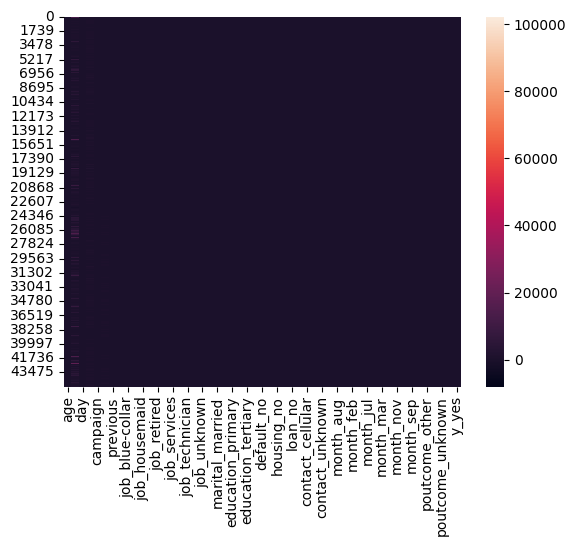

In [15]:
import seaborn as sns
sns.heatmap(data=data)

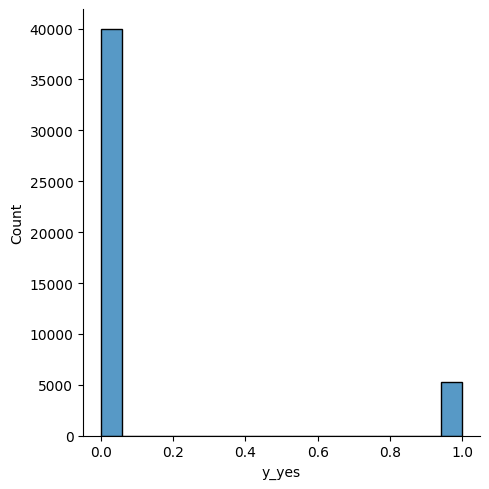

In [16]:
import matplotlib.pyplot as plt
sns.displot(data['y_yes'])

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


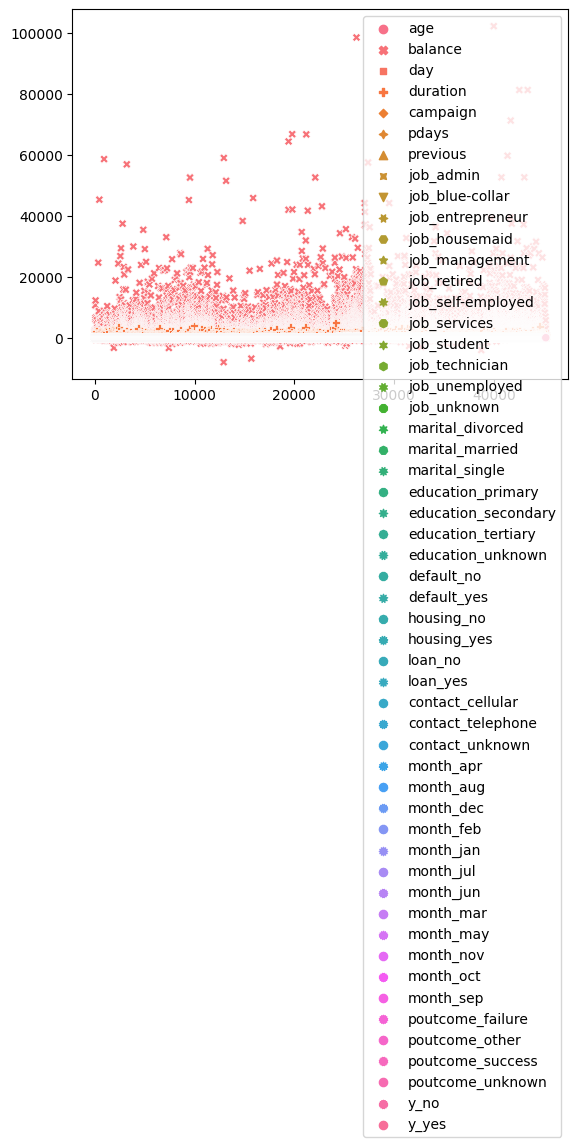

In [23]:
sns.scatterplot(data=data)

<Axes: xlabel='balance', ylabel='age'>

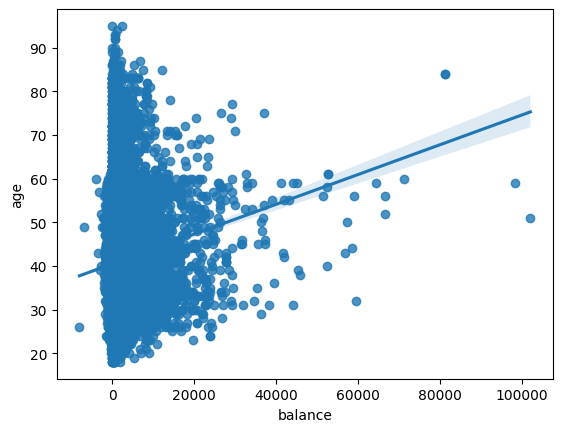

In [25]:
sns.regplot(data=data,x='balance',y='age')

In [17]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y_yes, Length: 45211, dtype: uint8

In [18]:
data_classifier= LogisticRegression()
data_classifier.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
data_classifier.coef_

array([[ 4.34782155e-02,  1.06574395e-05,  4.69159606e-02,
         4.34593362e-03, -5.90005256e-01,  8.81724075e-03,
        -8.29042457e-01, -2.75867995e-02, -4.57193485e-01,
        -5.25074161e-02, -2.16314237e-02,  3.37791387e-02,
         2.81046445e-01, -3.12349124e-02, -1.55874506e-01,
         7.50341966e-02, -1.11348377e-01,  6.62873963e-03,
         3.01958345e-03,  2.37563720e-02, -3.33426851e-01,
        -1.48198337e-01, -1.49847490e-01, -4.55809478e-01,
         1.23223878e-01,  2.45642735e-02, -4.19486548e-01,
        -3.83822678e-02,  6.98335998e-01, -1.15620481e+00,
        -8.00643728e-02, -3.77804443e-01,  2.53910297e-01,
         8.55740479e-02, -7.97353161e-01,  9.57439018e-02,
         5.38655867e-02,  5.82681915e-02, -1.30498147e-02,
        -4.91625309e-02, -1.51918405e-01, -9.25164292e-02,
         1.78737562e-01, -7.42092013e-01, -1.30119726e-01,
         1.88150281e-01,  1.46224580e-01, -2.80287784e-01,
        -8.04136550e-02,  5.99143774e-01, -6.96311151e-0

In [20]:
Beta_coefficents=pd.Series(data_classifier.coef_[0])
Beta_coefficents

0     0.043478
1     0.000011
2     0.046916
3     0.004346
4    -0.590005
5     0.008817
6    -0.829042
7    -0.027587
8    -0.457193
9    -0.052507
10   -0.021631
11    0.033779
12    0.281046
13   -0.031235
14   -0.155875
15    0.075034
16   -0.111348
17    0.006629
18    0.003020
19    0.023756
20   -0.333427
21   -0.148198
22   -0.149847
23   -0.455809
24    0.123224
25    0.024564
26   -0.419487
27   -0.038382
28    0.698336
29   -1.156205
30   -0.080064
31   -0.377804
32    0.253910
33    0.085574
34   -0.797353
35    0.095744
36    0.053866
37    0.058268
38   -0.013050
39   -0.049163
40   -0.151918
41   -0.092516
42    0.178738
43   -0.742092
44   -0.130120
45    0.188150
46    0.146225
47   -0.280288
48   -0.080414
49    0.599144
50   -0.696311
51   -4.317370
dtype: float64

In [21]:
y_pred=data_classifier.predict(X)

In [27]:
y_pred_df=pd.DataFrame({'actual':y,'prediction':y_pred})
y_pred_df

,actual,prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,1
45208,1,1
45209,0,0


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y,y_pred)
confusion_matrix

array([[39531,   391],
       [ 1296,  3993]])

In [29]:
#Accuracy
((39531+3993)/(39531+391+1296+3993))*100

96.26860719736348

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     39922
           1       0.91      0.75      0.83      5289

    accuracy                           0.96     45211
   macro avg       0.94      0.87      0.90     45211
weighted avg       0.96      0.96      0.96     45211



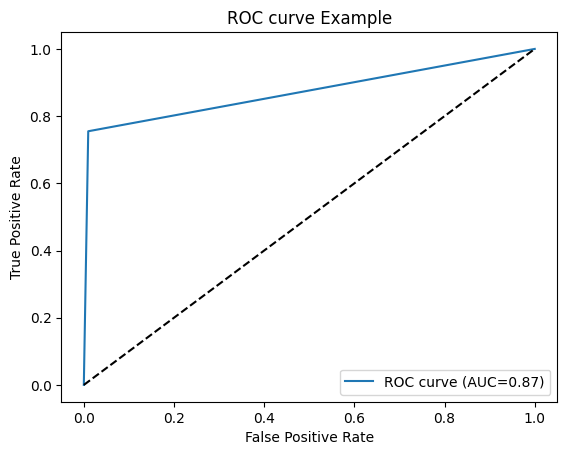

In [32]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt

fpr,tpr,threshold=roc_curve(y,y_pred)
auc=roc_auc_score(y,y_pred)
plt.plot(fpr,tpr,label='ROC curve (AUC=%0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve Example')
plt.legend(loc='lower right')
plt.show()
